In [35]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Import necessary libraries
import os  # To work with directories
from PIL import Image  # To manipulate images
import matplotlib.pyplot as plt  # To display images


In [37]:
# Load images into a dictionary
def load_images(folder_path):
    """
    Load all images from a folder into a dictionary.
    Each file's name (without extension) is used as the key.
    """
    images = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            letter = filename.split('.')[0].upper()  # Get letter from filename
            image_path = os.path.join(folder_path, filename)
            images[letter] = Image.open(image_path)
    return images

# Path to your ASL images (update the path as needed)
isl_folder_path = '/content/drive/MyDrive/isl_images'
isl_images = load_images(isl_folder_path)

# Verify the loaded images
print(f"Loaded {len(isl_images)} images")


Loaded 26 images


In [38]:
# Map text to corresponding images
def text_to_images(text, image_dict):
    """
    Convert input text into a list of corresponding images.
    """
    text = text.upper().replace(" ", "")  # Convert text to uppercase and remove spaces
    img_list = []
    for char in text:
        if char in image_dict:
            img_list.append(image_dict[char])
        else:
            print(f"Warning: '{char}' not found in the dataset")
    return img_list


In [39]:
# Stitch images horizontally
def stitch_images(image_list):
    """
    Stitch a list of images horizontally into a single image.
    """
    if not image_list:
        return None

    # Get dimensions of the final stitched image
    widths, heights = zip(*(img.size for img in image_list))
    total_width = sum(widths)  # Total width is the sum of all widths
    max_height = max(heights)  # Max height is the height of the tallest image

    # Create a blank image canvas
    stitched_image = Image.new('RGB', (total_width, max_height))

    # Paste each image into the canvas
    x_offset = 0
    for img in image_list:
        stitched_image.paste(img, (x_offset, 0))
        x_offset += img.width  # Move the offset to the right

    return stitched_image


Enter the text you want to convert to sign language: my name is vaish


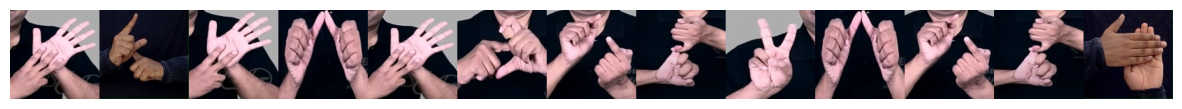

In [41]:
# Display text as sign language
def text_to_sign_language(text, image_dict):
    """
    Convert text input to a stitched image of sign language gestures.
    """
    images = text_to_images(text, image_dict)  # Get the list of images
    if images:
        stitched = stitch_images(images)  # Stitch images together
        plt.figure(figsize=(15, 5))  # Set display size
        plt.imshow(stitched)
        plt.axis('off')  # Remove axes for better visualization
        plt.show()
    else:
        print("No valid images to display.")

# Prompt the user for text input
user_input = input("Enter the text you want to convert to sign language: ").strip()

# Convert text to sign language images and display the result
text_to_sign_language(user_input, isl_images)
